# Math - Linear Algebra
Linear Algebra is the branch of mathematics that studies vector spaces and linear transformations between vector spaces, such as rotating a shape, scaling it up or down, translating it, etc.

# Vector
## Definition
A vector is a quantity defined by a magnitude and a direction. A vector can be represented by an array of numbers called *scalars*. Each scalar corresponds to the magnitude of the vector with regards to each dimension.

A list of N numbers may also represent the coordinates of a point in an N-dimensional space, so it is quite frequent represent vectors as simple point instead of arrows.

## Purpose
Vectors have many purposes in Machine Learning, most notably to represent observations and predictions.

## Vectors in python
A vector can be represented in many ways, for example a regular python list of numbers.

In [2]:
[11.0, 5.5, 3.4, 6.7]

[11.0, 5.5, 3.4, 6.7]

In [3]:
# it is better to use NumPy's array, 
# because we will do a lot of scientific calculations
import numpy as np

video = np.array([11.0, 5.5, 3.4, 6.7])
video

array([11. ,  5.5,  3.4,  6.7])

In [4]:
# the size of a vector
video.size

4

In [5]:
# accessing an element
video[2]

3.4

## Plotting vectors

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

### 2D vectors

In [16]:
u = np.array([1, 2])
v = np.array([5, 3])

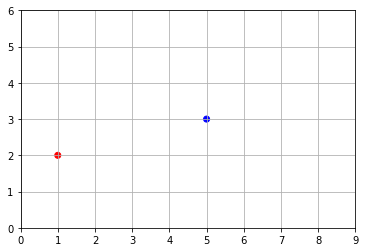

In [17]:
# plotting graph
x_coords, y_coords = zip(u, v)
plt.scatter(x_coords, y_coords, color=["r", "b"])
plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()

In [18]:
# vectors can also be represented as arrows
def plot_vector2d(vector2d, origin=[0,0], **options):
    return plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1],
                    head_width=0.2, head_length=0.3, length_includes_head=True,
                    **options)

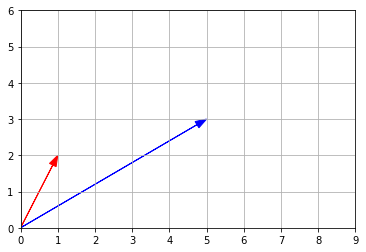

In [19]:
# draw the vectors
plot_vector2d(u, color="r")
plot_vector2d(v, color="b")
plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()

### 3D vectors

In [20]:
a = np.array([2, 4, 6])
b = np.array([1, 3, 5])

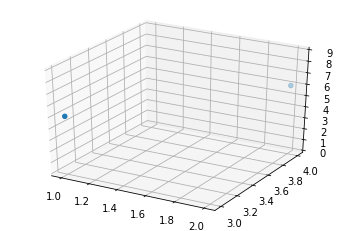

In [21]:
from mpl_toolkits.mplot3d import Axes3D

subplot3d = plt.subplot(111, projection="3d")
x_coords, y_coords, z_coords = zip(a,b)
subplot3d.scatter(x_coords, y_coords, z_coords)
subplot3d.set_zlim3d([0,9])
plt.show()

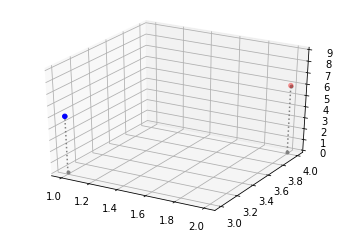

In [22]:
# add vertical lines to visualize better
def plot_vectors3d(ax, vectors3d, z0, **options):
    for v in vectors3d:
        x, y, z = v
        ax.plot([x,x], [y,y], [z0,z], color="gray", linestyle="dotted", marker=".")
    x_coords, y_coords, z_coords = zip(*vectors3d)
    ax.scatter(x_coords, y_coords, z_coords, **options)
    
subplot3d = plt.subplot(111, projection="3d")
subplot3d.set_zlim([0,9])
plot_vectors3d(subplot3d, [a,b], 0, color=("r","b"))
plt.show()

## Norm
The norm of a vector $\textbf{u}$, noted $\left \Vert \textbf{u} \right \|$, is a measure of the length (a.k.a. the magnitude) of $\textbf{u}$.

The norm that we will discuss is the Euclidian norm, defined:

$\left \Vert \textbf{u} \right \| = \sqrt{\sum_{i}{\textbf{u}_i}^2}$

We could implement it, by recalling $\sqrt x = x^{\frac{1}{2}}$

In [23]:
def vector_norm(vector):
    squares = [element**2 for element in vector]
    return sum(squares)**0.5

print("||", u, "||")
vector_norm(u)

|| [1 2] ||


2.23606797749979

In [24]:
# we can use Numpy's linalg (Linear Algebra)
import numpy.linalg as LA
LA.norm(u)

2.23606797749979

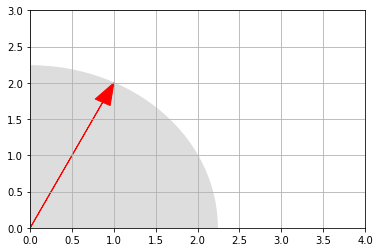

In [27]:
# let's plotting the vector u
radius = LA.norm(u)
plt.gca().add_artist(plt.Circle((0,0), radius, color="#DDDDDD"))
plot_vector2d(u, color="red")
plt.axis([0, 4, 0, 3])
plt.grid()
plt.show()

# The result of the plot, looks right

## Addition
Vectors of **same size** can be added together. Addition is performed *elementwise*

In [28]:
print(" ", u)
print("+", v)
print("-"*10)
u + v

  [1 2]
+ [5 3]
----------


array([6, 5])

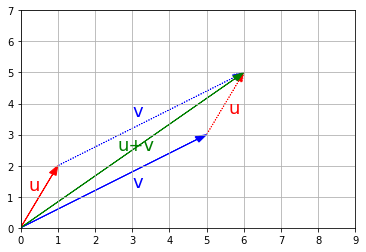

In [43]:
# let's plot the addition graph
plot_vector2d(u, color="r")
plot_vector2d(v, color="b")
plot_vector2d(v, origin=u, color="b", linestyle="dotted")
plot_vector2d(u, origin=v, color="r", linestyle="dotted")
plot_vector2d(u+v, color="g")
plt.axis([0, 9, 0, 7])
plt.text(0.2, 1.2, "u", color="r", fontsize=18)
plt.text(5.6, 3.7, "u", color="r", fontsize=18)
plt.text(3, 1.3, "v", color="b", fontsize=18)
plt.text(3, 3.6, "v", color="b", fontsize=18)
plt.text(2.6, 2.5, "u+v", color="g", fontsize=18)
plt.grid()
plt.show()

Vector addition is **commutative**, meaning that $\textbf{u} + \textbf{v} = \textbf{v} + \textbf{u}$

Vector addition is also **associative**, meaning that $\textbf{u} + (\textbf{v} + \textbf{w}) = (\textbf{u} + \textbf{v}) + \textbf{w}$

If we have a shape defined by a number points (vectors), and we add a vector $\textbf{v}$ to all of these points, then the whole shape gets shifted by $\textbf{v}$. This is called **geometric translation**

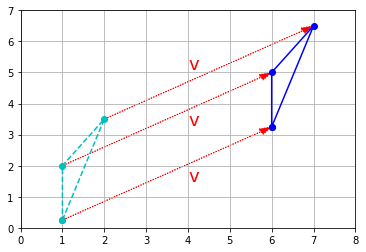

In [59]:
t1 = np.array([1, 0.25])
t2 = np.array([2, 3.5])
t3 = np.array([1, 2])

x_coords, y_coords = zip(t1, t2, t3, t1)
plt.plot(x_coords, y_coords, "c--", x_coords, y_coords, "co")

plot_vector2d(v, t1, color="r", linestyle=":")
plot_vector2d(v, t2, color="r", linestyle=":")
plot_vector2d(v, t3, color="r", linestyle=":")

t1b = t1 + v
t2b = t2 + v
t3b = t3 + v

x_coords_b, y_coords_b = zip(t1b, t2b, t3b, t1b)
plt.plot(x_coords_b, y_coords_b, "b-", x_coords_b, y_coords_b, "bo")

plt.text(4, 5.1, "v", color="r", fontsize=18)
plt.text(4, 3.3, "v", color="r", fontsize=18)
plt.text(4, 1.5, "v", color="r", fontsize=18)

plt.axis([0, 8, 0, 7])
plt.grid()
plt.show()

## Multiplication by a scalar
Vectors can be multiplied by scalars.

In [61]:
print("2.1 *", u, "=")

2.1 * u

2.1 * [1 2] =


array([2.1, 4.2])

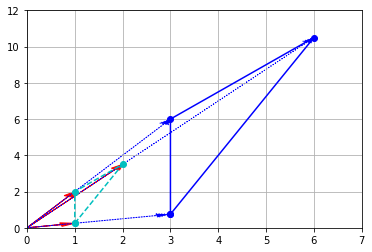

In [65]:
# scalar multiplications results in changing the scale of the figure, hence the name scalar

k = 3 # scalar
t1c = k * t1
t2c = k * t2
t3c = k * t3

plt.plot(x_coords, y_coords, "c--", x_coords, y_coords, "co")

plot_vector2d(t1, color="r")
plot_vector2d(t2, color="r")
plot_vector2d(t3, color="r")

x_coords_c, y_coords_c = zip(t1c, t2c, t3c, t1c)
plt.plot(x_coords_c, y_coords_c, "b-", x_coords_c, y_coords_c, "bo")

plot_vector2d(k * t1, color="b", linestyle=":")
plot_vector2d(k * t2, color="b", linestyle=":")
plot_vector2d(k * t3, color="b", linestyle=":")

plt.axis([0, 7, 0, 12])
plt.grid()
plt.show()

Dividing a vector by a scalar is equivalent to multiplying by its inverse:

$\dfrac{\textbf{u}}{\lambda} = \dfrac{1}{\lambda} \times \textbf{u}$

Scalar multiplication is **commutative**: $\lambda \times \textbf{u} = \textbf{u} \times \lambda$.

It is also **associative**: $\lambda_1 \times (\lambda_2 \times \textbf{u}) = (\lambda_1 \times \lambda_2) \times \textbf{u}$.

Finally, it is **distributive** over addition of vectors: $\lambda \times (\textbf{u} + \textbf{v}) = \lambda \times \textbf{u} + \lambda \times \textbf{v}$.

## Zero, unit and normalized vectors
- A **zero-vector** is a vector full of 0s
- A **unit vector** is a vector with a norm equal to 1
- The **normalized vector** of a non-null vector $\textbf{u}$, noted $\hat{\textbf{u}}$, is the unit vector that points in the same direction as $\textbf{u}$. It is equal to: $\hat{\textbf{u}} = \dfrac{\textbf{u}}{\left \Vert \textbf{u} \right \|}$

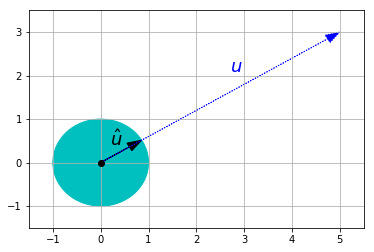

In [70]:
plt.gca().add_artist(plt.Circle((0,0),1,color='c'))
plt.plot(0, 0, "ko")
plot_vector2d(v / LA.norm(v), color="k")
plot_vector2d(v, color="b", linestyle=":")
plt.text(0.2, 0.4, "$\hat{u}$", color="k", fontsize=18)
plt.text(2.7, 2.1, "$u$", color="b", fontsize=18)
plt.axis([-1.5, 5.5, -1.5, 3.5])
plt.grid()
plt.show()

## Dot product
The dot product (*scalar product or inner product*) of two vectors $\textbf{u}$ and $\textbf{v}$ is noted $\textbf{u} \cdot \textbf{v}$ or $(\textbf{u}|\textbf{v})$, and it is defined as:

$\textbf{u} \cdot \textbf{v} = \left \Vert \textbf{u} \right \| \times \left \Vert \textbf{v} \right \| \times cos(\theta)$

where $\theta$ is the angle between $\textbf{u}$ and $\textbf{v}$

Another way is:

$\textbf{u} \cdot \textbf{v} = \sum_i{\textbf{u}_i \times \textbf{v}_i}$

In [71]:
def dot_product(v1, v2):
    return sum(v1i * v2i for v1i, v2i in zip(v1,v2))

dot_product(u, v)

11

In [72]:
# Numpy's dot product
np.dot(u, v)

11

In [73]:
# Numpy's array dot
u.dot(v)

11

### Main properties
- The dot product is **commutative**: $\textbf{u} \cdot \textbf{v} = \textbf{v} \cdot \textbf{u}$.
- The dot product is only defined between two vectors, not between a scalar and a vector. This means that we cannot chain dot products: for example, the expression $\textbf{u} \cdot \textbf{v} \cdot \textbf{w}$ is not defined since $\textbf{u} \cdot \textbf{v}$ is a scalar and $\textbf{w}$ is a vector.
- The dot product is **NOT associative**: $(\textbf{u} \cdot \textbf{v}) \cdot \textbf{w} ≠ \textbf{u} \cdot (\textbf{v} \cdot \textbf{w})$
- The dot product is **associative with regards to scalar multiplication**: $\lambda \times (\textbf{u} \cdot \textbf{v}) = (\lambda \times \textbf{u}) \cdot \textbf{v} = \textbf{u} \cdot (\lambda \times \textbf{v})$
- The dot product is **distributive** over addition of vectors: $\textbf{u} \cdot (\textbf{v} + \textbf{w}) = \textbf{u} \cdot \textbf{v} + \textbf{u} \cdot \textbf{w}$.

### Calculating the angle between vectors
Based on the dot product definition, we can deduce the following formula:

$\theta = \arccos{\left ( \dfrac{\textbf{u} \cdot \textbf{v}}{\left \Vert \textbf{u} \right \| \times \left \Vert \textbf{v} \right \|} \right ) }$

**Note:**
- If $\textbf{u} \cdot \textbf{v} = 0$, it follows that $\theta = \dfrac{π}{2}$. It means that they are **orthogonal**.

In [74]:
# calculate the angle between u and v (in radians)
def vector_angle(u, v):
    cos_theta = u.dot(v) / LA.norm(u) / LA.norm(v)
    return np.arccos(np.clip(cos_theta, -1, 1))

theta = vector_angle(u, v)
print("Angle =", theta, "radians")
print("      =", theta * 180 / np.pi, "degrees")

Angle = 0.5667292175235066 radians
      = 32.471192290848506 degrees


**Note:** due to small floating point errors, cos_theta may be very slightly outside of the $[-1, 1]$ interval, which would make arccos fail. This is why we clipped the value within the range, using NumPy's clip function.

### Projecting a point onto an axis
he projection of vector $\textbf{v}$ onto $\textbf{u}$'s axis is given by this formula:

$\textbf{proj}_{\textbf{u}}{\textbf{v}} = \dfrac{\textbf{u} \cdot \textbf{v}}{\left \Vert \textbf{u} \right \| ^2} \times \textbf{u}$

Which equivalent to:

$\textbf{proj}_{\textbf{u}}{\textbf{v}} = (\textbf{v} \cdot \hat{\textbf{u}}) \times \hat{\textbf{u}}$

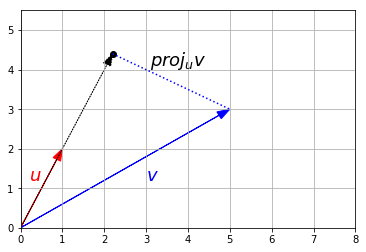

In [79]:
u_normalized = u / LA.norm(u)
proj = v.dot(u_normalized) * u_normalized

plot_vector2d(u, color="r")
plot_vector2d(v, color="b")

plot_vector2d(proj, color="k", linestyle=":")
plt.plot(proj[0], proj[1], "ko")

plt.plot([proj[0], v[0]], [proj[1], v[1]], "b:")

plt.text(3.1, 4.1, "$proj_u v$", color="k", fontsize=18)
plt.text(3, 1.2, "$v$", color="b", fontsize=18)
plt.text(0.2, 1.2, "$u$", color="r", fontsize=18)

plt.axis([0, 8, 0, 5.5])
plt.grid()
plt.show()